<table align="center">
  <td align="center"><a target="_blank" 
 href="https://colab.research.google.com/github/umbcdata602/spring2021/blob/master/perceptron.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Perceptron

This notebook contains the first few code cells of Raschka's ch02.ipynb with little modification.

Two changes enable animation of the training process:

* Perceptron initializes model parameters `__init__()` so we can train incrementally.
* Added configurable margin to decision-region plotting function.

### References

* [Python Machine Learning, 3rd Edition](https://github.com/rasbt/python-machine-learning-book-3rd-edition) (2019) by Rashka & Mirjalili -- github
    * [ch02.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb) -- github

In [ ]:
# The Perceptron class has an API similar to scikit-learn
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
# Load the Iris data directly from the UC Irvine archive
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

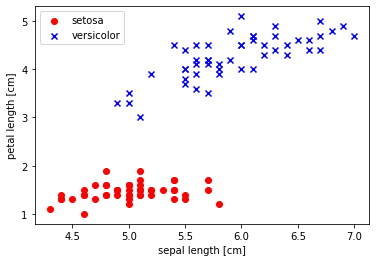

In [ ]:
# Plot a subset of the data (2 features for 2 classes)
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left');

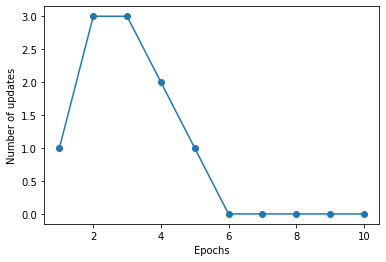

In [ ]:
# Train the model
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

In [ ]:
# Convenience function for plotting the decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02, margin=1):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    x2_min, x2_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

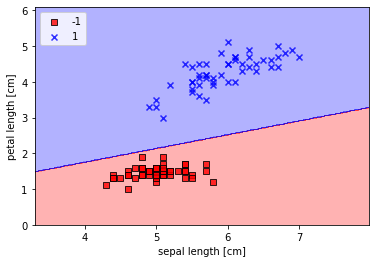

In [ ]:
# Plot the decision region
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left');

# animate training

The next cell zooms out to plot a sequence of epochs, pausing to visualize weight updates.

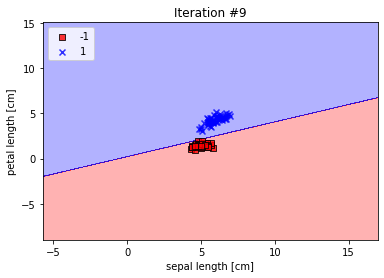

In [ ]:
from IPython import display
import time

# Initialize the model with n_iter = 1
ppn = Perceptron(eta=0.1, n_iter=1)

for iter in range(10):
    ppn.fit(X, y)
    plot_decision_regions(X, y, classifier=ppn, margin=10)
    plt.title('Iteration #{}'.format(iter))
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left');
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)
    plt.close()